In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [14]:
import pandas as pd
import numpy as np
import os
import cv2
import pickle
import json
import numpy as np
from scipy import spatial

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Input
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display, Image

this W003548903.png


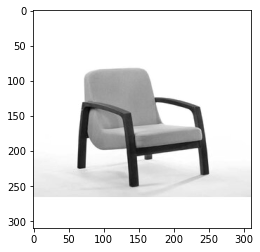

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [15]:
path = "images/wayfair/chair"
for img in os.listdir(path):  # iterate over each image per dogs and cats
     
    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
    print('this',img)
    plt.imshow(img_array, cmap='gray')  # graph it
    plt.show()  # display!
    print(img_array)

    break  # we just want one for now so break


In [24]:
def create_training_data(path, IMG_SIZE):
    training_data= []
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append((img, new_array/255))
        except:
            pass
        
    return training_data

In [25]:
path = "images/wayfair/chair"
training_data = create_training_data(path, 28)

In [29]:
print(len(training_data), training_data[0][1].shape)

8700 (28, 28)


In [35]:
IMG_SIZE = 28

X = []
y = []

for name,features in training_data:
    X.append(features)
    y.append(name)


#print(X[1].reshape(-1, IMG_SIZE, IMG_SIZE, 1), X[1].shape)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # make the last number 3 if you want to make COLOR images
X[0].shape

(28, 28, 1)

In [36]:
X.shape

(8700, 28, 28, 1)

In [3]:
epochs = 20
batch_size = 300
image_dimension = 28

In [44]:
model = tf.keras.models.Sequential()

model.add(Dense(128,  activation='relu', input_shape=(28,28,1)))
model.add(Dense(64,  activation='relu'))
model.add(Dense(2,    activation='linear', name="bottleneck"))
model.add(Dense(64,  activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(784,  activation='linear'))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 28, 28, 128)       256       
_________________________________________________________________
dense_11 (Dense)             (None, 28, 28, 64)        8256      
_________________________________________________________________
bottleneck (Dense)           (None, 28, 28, 2)         130       
_________________________________________________________________
dense_12 (Dense)             (None, 28, 28, 64)        192       
_________________________________________________________________
dense_13 (Dense)             (None, 28, 28, 128)       8320      
_________________________________________________________________
dense_14 (Dense)             (None, 28, 28, 784)       101136    
Total params: 118,290
Trainable params: 118,290
Non-trainable params: 0
________________________________________________

In [49]:
tf.config.run_functions_eagerly(True)

In [50]:
history = model.fit(X.astype(float), X.astype(float),
                     batch_size=300,
                     epochs=20)

/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


Epoch 1/20
29/29 [==============================] - 135s 5s/step - loss: 0.3965
Epoch 2/20
29/29 [==============================] - 140s 5s/step - loss: 0.0307
Epoch 3/20
29/29 [==============================] - 146s 5s/step - loss: 0.0111
Epoch 4/20
29/29 [==============================] - 147s 5s/step - loss: 0.0049
Epoch 5/20
29/29 [==============================] - 130s 4s/step - loss: 0.0013
Epoch 6/20
29/29 [==============================] - 134s 5s/step - loss: 6.9188e-05
Epoch 7/20
29/29 [==============================] - 152s 5s/step - loss: 1.0788e-05
Epoch 8/20
29/29 [==============================] - 132s 5s/step - loss: 7.0515e-06
Epoch 9/20
29/29 [==============================] - 136s 5s/step - loss: 5.2619e-06
Epoch 10/20
29/29 [==============================] - 122s 4s/step - loss: 3.9300e-06
Epoch 11/20
29/29 [==============================] - 127s 4s/step - loss: 2.8253e-06
Epoch 12/20
29/29 [==============================] - 125s 4s/step - loss: 1.9508e-06
Epoch 13/

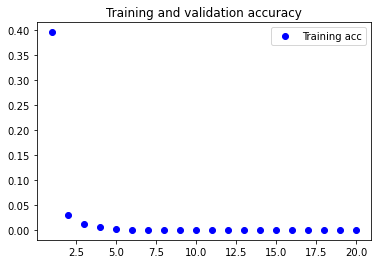

<Figure size 432x288 with 0 Axes>

In [54]:
# Plot accuracy and loss for training and validation sets

loss = history.history['loss']


epochs = range(1,21)

plt.plot(epochs, loss, 'bo', label='Training acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


plt.show()

In [55]:
# Save model
model.save('./model/autoencoder.h5')

Text(0.5, 0, 'epoch')

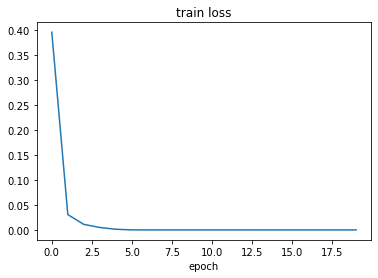

In [56]:
plt.title("train loss")
plt.plot( history.history["loss"] )
plt.xlabel("epoch")

In [60]:
# Save feature extractor
feature_extractor = \
    Model(inputs=model.input, outputs=model.get_layer('bottleneck').output)


In [58]:
feature_extractor

In [ ]:
def create_testing_data(path, IMG_SIZE):
    training_data= []
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append((img, new_array/255))
        except:
            pass
        
    return training_data

In [61]:
pwd

'/Users/bahar/Desktop/Cap3/image_search_engine'

In [64]:
# plot the autoencoder
plot_model(model, 'autoencoder.png', show_shapes=True)

NameError: name 'plot_model' is not defined

In [62]:
feature_extractor.save('model/feature_extractor.h5')

KeyError: 'dense_10_input_ib-0'

In [63]:
model.compiled_metrics == None

False

# <span style="color:pink">Agha Soorati</span> 

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Flatten, Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization, Input, Dense, Reshape, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import pickle
import pandas as pd
from difflib import SequenceMatcher

In [17]:
# Load images
img_height = 50
img_width = 50
channels = 3
batch_size = 16

train_datagen = ImageDataGenerator(#rotation_range=40,
                                   #width_shift_range=0.2,
                                   #height_shift_range=0.2,
                                   rescale=1./255,
                                   #shear_range=0.2,
                                   #zoom_range=0.2,
                                   #horizontal_flip=True,
                                   #fill_mode='nearest',
                                   validation_split=0.2)

training_set = train_datagen.flow_from_directory(
    './images/wayfair',
     target_size = (img_height, img_width),
     batch_size = batch_size,
     class_mode = 'input',
     subset = 'training',
     shuffle=True)

validation_set = train_datagen.flow_from_directory(
    './images/wayfair',
     target_size = (img_height, img_width),
     batch_size = batch_size,
     class_mode = 'input',
     subset = 'validation',
     shuffle=False)

Found 13920 images belonging to 2 classes.
Found 3480 images belonging to 2 classes.


In [18]:
# Define the autoencoder
input_model = Input(shape=(img_height, img_width, channels))

# Encoder layers
encoder = Conv2D(32, (3,3), padding='same', kernel_initializer='normal')(input_model)
encoder = LeakyReLU()(encoder)
encoder = BatchNormalization(axis=-1)(encoder)

encoder = Conv2D(64, (3,3), padding='same', kernel_initializer='normal')(encoder)
encoder = LeakyReLU()(encoder)
encoder = BatchNormalization(axis=-1)(encoder)

encoder = Conv2D(64, (3,3), padding='same', kernel_initializer='normal')(input_model)
encoder = LeakyReLU()(encoder)
encoder = BatchNormalization(axis=-1)(encoder)

encoder_dim = K.int_shape(encoder)
encoder = Flatten()(encoder)

# Latent Space
latent_space = Dense(16, name='latent_space')(encoder)

# Decoder Layers
decoder = Dense(np.prod(encoder_dim[1:]))(latent_space)
decoder = Reshape((encoder_dim[1], encoder_dim[2], encoder_dim[3]))(decoder)

decoder = Conv2DTranspose(64, (3,3), padding='same', kernel_initializer='normal')(decoder)
decoder = LeakyReLU()(decoder)
decoder = BatchNormalization(axis=-1)(decoder)

decoder = Conv2DTranspose(64, (3,3), padding='same', kernel_initializer='normal')(decoder)
decoder = LeakyReLU()(decoder)
decoder = BatchNormalization(axis=-1)(decoder)

decoder = Conv2DTranspose(32, (3,3), padding='same', kernel_initializer='normal')(decoder)
decoder = LeakyReLU()(decoder)
decoder = BatchNormalization(axis=-1)(decoder)

decoder = Conv2DTranspose(3, (3, 3), padding="same")(decoder)
output = Activation('sigmoid', name='decoder')(decoder)

# Create model object
autoencoder = Model(input_model, output, name='autoencoder')

# Model Summary
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        1792      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 50, 50, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 50, 50, 64)        256       
_________________________________________________________________
flatten_2 (Flatten)          (None, 160000)            0         
_________________________________________________________________
latent_space (Dense)         (None, 16)                2560016   
_________________________________________________________________
dense (Dense)                (None, 160000)            

In [20]:
# Compile the model
autoencoder.compile(loss="mse", optimizer= Adam(learning_rate=1e-3))

# Fit the model
history = autoencoder.fit_generator(
          training_set,
          steps_per_epoch=training_set.n // batch_size,
          epochs=20,
          validation_data=validation_set,
          validation_steps=validation_set.n // batch_size,
          callbacks = [ModelCheckpoint('model/image_autoencoder_2.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False)])

# Save model
autoencoder.save('model/image_autoencoder_2.h5')

Epoch 1/20
870/870 [==============================] - 391s 448ms/step - loss: 0.0264 - val_loss: 0.0224
Epoch 2/20
870/870 [==============================] - 374s 430ms/step - loss: 0.0240 - val_loss: 0.0245
Epoch 3/20
870/870 [==============================] - 357s 411ms/step - loss: 0.0235 - val_loss: 0.0214
Epoch 4/20
870/870 [==============================] - 357s 410ms/step - loss: 0.0229 - val_loss: 0.0225
Epoch 5/20
870/870 [==============================] - 356s 409ms/step - loss: 0.0224 - val_loss: 0.0234
Epoch 6/20
870/870 [==============================] - 359s 412ms/step - loss: 0.0220 - val_loss: 0.0204
Epoch 7/20
870/870 [==============================] - 356s 410ms/step - loss: 0.0215 - val_loss: 0.0239
Epoch 8/20
870/870 [==============================] - 357s 410ms/step - loss: 0.0212 - val_loss: 0.0208
Epoch 9/20
870/870 [==============================] - 356s 410ms/step - loss: 0.0208 - val_loss: 0.0223
Epoch 10/20
870/870 [==============================] - 357s 410m

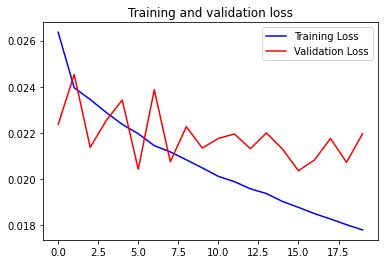

In [21]:
# Plot Accuracy and Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(loss))
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [22]:
autoencoder = load_model('model/image_autoencoder_2.h5', compile=False)

In [26]:
# Predict image function
def predict_image(image_dir, autoencoder):
    
    raw_image = load_img(image_dir, target_size=(50, 50))
    image = img_to_array(raw_image)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    pred = autoencoder.predict(image)
    pred = pred * 255.0
    pred = np.reshape(pred, (50, 50, 3))
    pred = array_to_img(pred)

    return raw_image, pred


In [27]:
training_set.filepaths[0:3]

['./images/wayfair/chair/ONAW3819.png',
 './images/wayfair/chair/ONAW3833.png',
 './images/wayfair/chair/ONAW3868.png']

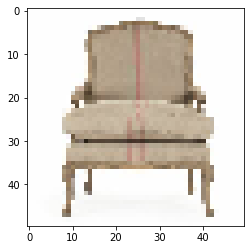

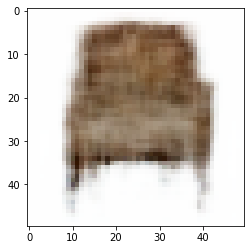

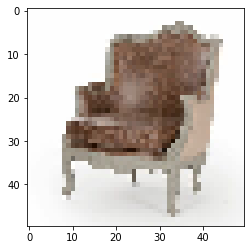

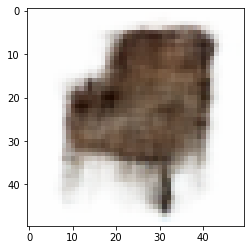

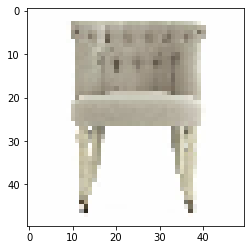

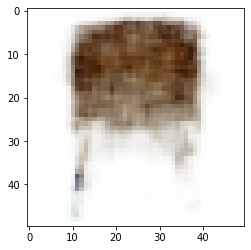

In [28]:
# Predict 3 images from training set
train_imgs = training_set.filepaths[0:3]

for i in train_imgs:
    raw_image, pred_image = predict_image(i, autoencoder)

    # Show original image
    plt.imshow(raw_image)
    plt.show()

    # Show predicted image
    plt.imshow(pred_image)
    plt.show()

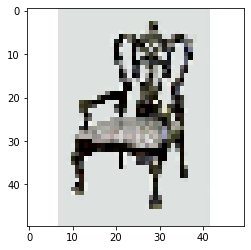

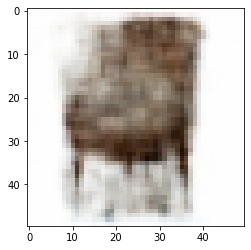

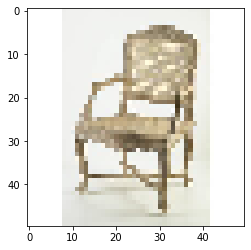

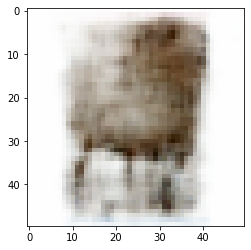

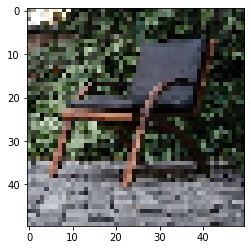

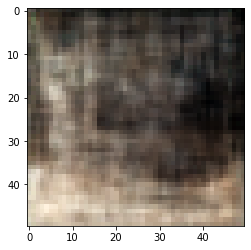

In [29]:
# Predict 3 images from validation set
val_imgs = validation_set.filepaths[0:3]

for i in val_imgs:
    raw_image, pred_image = predict_image(i, autoencoder)
  
    # Show original image
    plt.imshow(raw_image)
    plt.show()
  
    # Show predicted image
    plt.imshow(pred_image)
    plt.show()

In [30]:
# Create model with latent space layer
autoencoder = load_model('model/image_autoencoder_2.h5', compile=False)
latent_space_model = Model(autoencoder.input, autoencoder.get_layer('latent_space').output)

In [32]:
# Load all images and predict them with the latent space model
X = []
indices = []

for i in tqdm(range(len(os.listdir('/Users/bahar/Desktop/all')))):
    
    try:
    
        img_name = os.listdir('/Users/bahar/Desktop/all')[i]
        img = load_img('/Users/bahar/Desktop/all/{}'.format(img_name), target_size = (50, 50))
        img = img_to_array(img) / 255.0
        img = np.expand_dims(img, axis=0)
        pred = latent_space_model.predict(img)
        pred = np.resize(pred, (16))
        X.append(pred)
        indices.append(img_name)

    except:
        print(img_name)

<ipython-input-32-20808cac1200>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(os.listdir('/Users/bahar/Desktop/all')))):


  0%|          | 0/17400 [00:00<?, ?it/s]

In [33]:
# Export the embeddings
embeddings = {'indices': indices, 'features': np.array(X)}

pickle.dump(embeddings, open('./model/image_embeddings_2.pickle', 'wb'))

In [34]:
def eucledian_distance(x,y):
    eucl_dist = np.linalg.norm(x - y)
    return eucl_dist


In [39]:
from numpy import dot
from numpy.linalg import norm



def cosine_similarity(x,y):
    cos_sim = dot(x, y)/(norm(x)*norm(y))
    return cos_sim

In [35]:
# Load embeddings
embeddings = pickle.load(open('./model/image_embeddings_2.pickle', 'rb'))

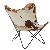

In [41]:
# Get image name
img_name = '/Users/bahar/Desktop/6.png'
img = load_img(img_name, target_size = (50,50))  #target_size=(28, 28)
img

<ipython-input-38-5d9975e9fc4f>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(embeddings['indices']))):


  0%|          | 0/17400 [00:00<?, ?it/s]

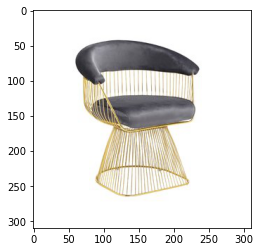

Euclidean Distance: 1490.281005859375


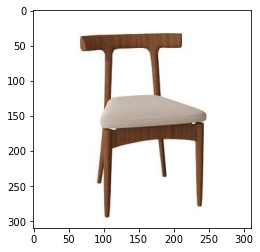

Euclidean Distance: 1504.7086181640625


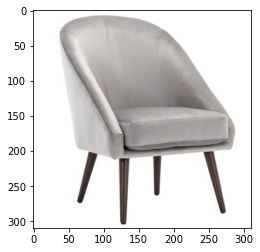

Euclidean Distance: 1574.2178955078125


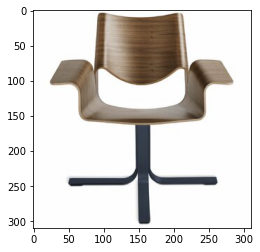

Euclidean Distance: 1631.4427490234375


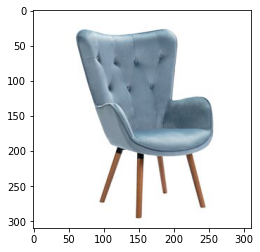

Euclidean Distance: 1632.442626953125


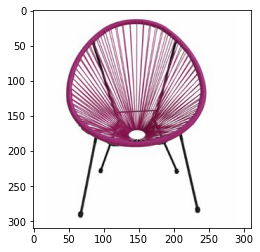

Euclidean Distance: 1649.2774658203125


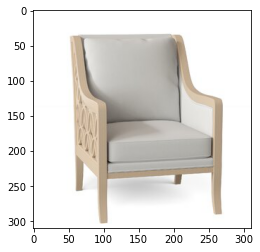

Euclidean Distance: 1664.268798828125


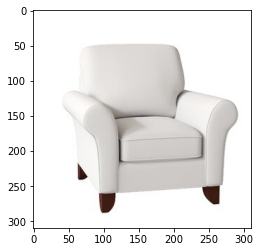

Euclidean Distance: 1686.556396484375


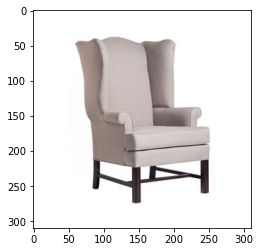

Euclidean Distance: 1687.6954345703125


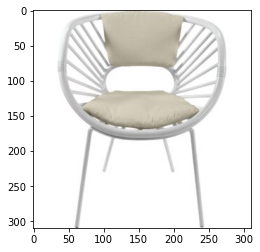

Euclidean Distance: 1692.022216796875


In [38]:
# Calculate eucledian distance
img_similarity = []

# Get actual image embedding
img = img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)
pred = latent_space_model.predict(img)
pred = np.resize(pred, (16))

for i in tqdm(range(len(embeddings['indices']))):
    img_name = embeddings['indices'][i]

    # Calculate vectors distances
    dist = eucledian_distance(pred,embeddings['features'][i])
    img_similarity.append(dist)

imgs_result = pd.DataFrame({'img': embeddings['indices'],
                            'euclidean_distance': img_similarity})


imgs_result = imgs_result.query('euclidean_distance > 0').sort_values(by='euclidean_distance', ascending=True).reset_index(drop=True)
imgs_result = imgs_result.iloc[0:20,:]

# Show 10 first similar images
for i in range(10):
    image = load_img('/Users/bahar/Desktop/all/{}'.format(imgs_result['img'].values[i]))
    
  
    # Show image
    plt.imshow(image)
    plt.show()
    
    print('Euclidean Distance: {}'.format(imgs_result['euclidean_distance'].values[i]))
    


<ipython-input-42-75238657f942>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(embeddings['indices']))):


  0%|          | 0/17400 [00:00<?, ?it/s]

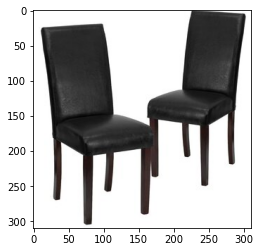

Euclidean Distance: 3.858697891701013e-05


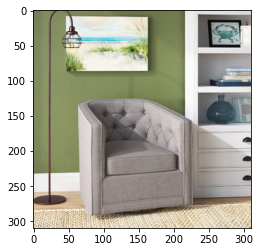

Euclidean Distance: 9.707065328257158e-05


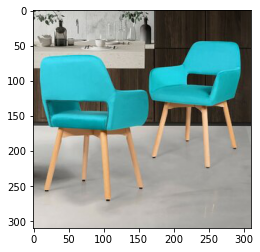

Euclidean Distance: 0.00018259382341057062


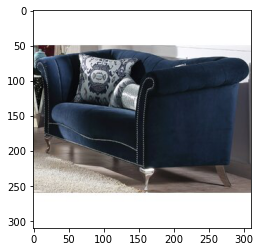

Euclidean Distance: 0.00023364137450698763


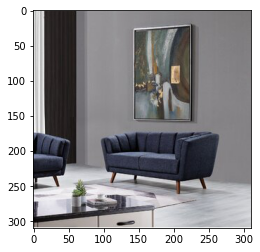

Euclidean Distance: 0.0002799693902488798


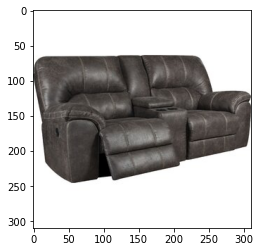

Euclidean Distance: 0.0003107271040789783


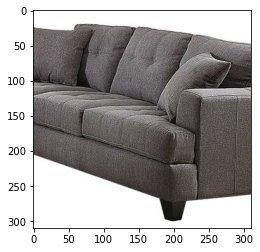

Euclidean Distance: 0.000317924190312624


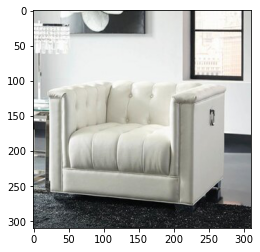

Euclidean Distance: 0.0003211196162737906


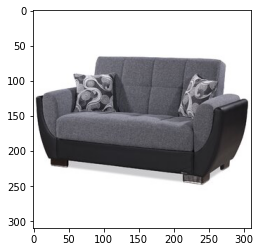

Euclidean Distance: 0.00038210456841625273


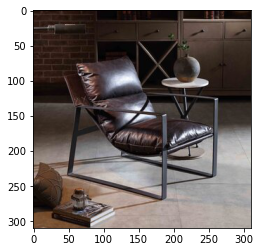

Euclidean Distance: 0.0004159273230470717


In [42]:
# Calculate cosine similarity
img_similarity = []

# Get actual image embedding
img = img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)
pred = latent_space_model.predict(img)
pred = np.resize(pred, (16))

for i in tqdm(range(len(embeddings['indices']))):
    img_name = embeddings['indices'][i]

    # Calculate vectors distances
    dist = cosine_similarity(pred,embeddings['features'][i])
    img_similarity.append(dist)

imgs_result = pd.DataFrame({'img': embeddings['indices'],
                            'euclidean_distance': img_similarity})


imgs_result = imgs_result.query('euclidean_distance > 0').sort_values(by='euclidean_distance', ascending=True).reset_index(drop=True)
imgs_result = imgs_result.iloc[0:20,:]

# Show 10 first similar images
for i in range(10):
    image = load_img('/Users/bahar/Desktop/all/{}'.format(imgs_result['img'].values[i]))
    
  
    # Show image
    plt.imshow(image)
    plt.show()
    
    print('Euclidean Distance: {}'.format(imgs_result['euclidean_distance'].values[i]))
    
